In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data= pd.read_csv("ex2data1.txt", header=None)

m=data.shape[0]#No. of training examples
n=data.shape[1]-1 #No. of paramters

X, y, theta= np.array(data[list(range(n))]), np.array(data[n]), np.array(np.zeros(n+1))
print(X,y,theta)
print(m,n)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

In [139]:
#Separating all positive and negative entries into arrays that store their indices
pos,neg= (y==1).reshape(100,1), (y==0).reshape(100,1)
print(pos)

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [116]:
#VISUALIZING DATA with Logistic Plot
def plotData(X,y):
    plt.figure(figsize=(8,6))
    plt.scatter(X[pos[:,0],0],X[pos[:,0],1],color='darkblue',marker='+',label='Admitted')
    plt.scatter(X[neg[:,0],0],X[neg[:,0],1],color='orange',marker='o',label='Not-Admitted')
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend()
    plt.show();
    

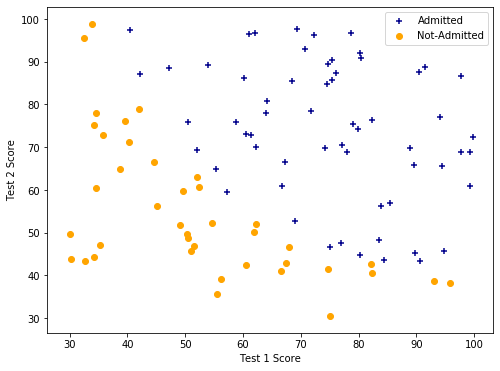

In [117]:
plotData(X,y)

In [118]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [119]:
def costFunction(theta,X,y):
    h= sigmoid(np.matmul(X,theta)) #Hypothesis Function
    
    J= -sum(y*np.log(h) + (1-y)*np.log(1-h))/m #Cost Function
    
    grad= np.matmul(np.transpose(X), h-y)/m
    
    return J,grad

In [120]:
def normalize(X):
    mean= np.mean(X, axis=0)
    std= np.std(X, axis=0)
    X_normal= (X-mean)/std
    return X_normal,mean,std

In [121]:
#actual normalisation
X,X_mean,X_std= normalize(X)
X=np.insert(X,0,1,axis=1)

In [122]:
def gradientDescent(X,y,theta,alpha,iters):
    J_history=[]
    for i in range(iters):
        J,grad=costFunction(theta,X,y)
        theta-= alpha*grad;
        J_history.append(J)
                    
    return theta, J_history        

In [123]:
theta, J_history= gradientDescent(X,y,theta,2,500)

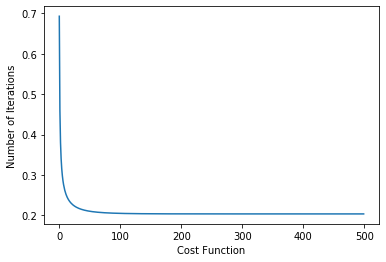

In [124]:
#Plotting of J vs No. of Iterations to see if its actually decreasing
plt.plot(J_history)
plt.xlabel("Cost Function")
plt.ylabel("Number of Iterations")
plt.show();

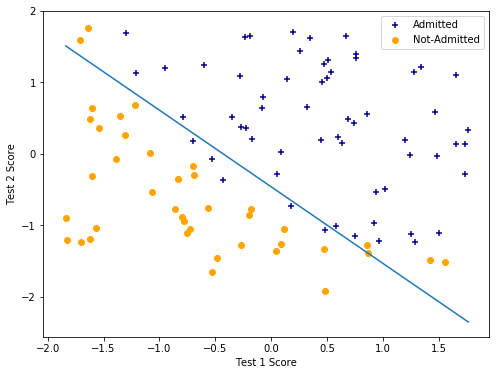

In [125]:
#Plotting the Decision Boundary as well
#Decision Boundary corresponds to theta0 + theta1*X1 + theta2*X2=0 therefore, we plot x2= theta0 + theta1*x1/-theta2
#Therefore we only take two points on the line and use plt.plot as it automatically jjoins a line to them
#Therefore for the two points we take the boundary values of X1 i.e the max and min values of X1
#Also since we appended one, the index of X1 column vector has changed to 1 (column index)

X1=np.array([np.max(X[:,1]),np.min(X[:,1])])
X2= (X1*theta[1]+theta[0])/(-theta[2])

#To plot the original data, copied from plotFunction()
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],color='darkblue',marker='+',label='Admitted')
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],color='orange',marker='o',label='Not-Admitted')
plt.xlabel('Test 1 Score')
plt.ylabel('Test 2 Score')
plt.legend()
plt.plot(X1,X2)
"""
plt.xticks(np.arange(30,100,8))
plt.yticks(np.arange(20,100,9))
"""
plt.show();

In [126]:
def predict(X):
    return np.matmul(X,theta)>0

In [136]:
X_test=[52,72]
X_trial=(X_test-X_mean)/X_std
Xtrial=np.append([1,],X_trial)
print(X_trial)
print(sigmoid(np.matmul(Xtrial,theta)))

[-0.70474122  0.3124995 ]
0.5171015946889395


In [ ]:
p=predict(X)
efficiency= sum(p==y)/m

In [ ]:
print(efficiency)